In [1]:
%matplotlib inline
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
from hp_align import rotate_ra_dec
from surveyStatus import *
from utils import wrapRADec

/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
field_data = np.loadtxt('fieldID.dat', delimiter='|', skiprows=1,
                        dtype=list(zip(['id', 'ra', 'dec'], [int, float, float])))

ra_range = 15.  # Degrees
dec_range = 25.
good = np.where(((field_data['ra'] <= ra_range) | (field_data['ra'] >= 360.-ra_range)) &
                ((field_data['dec'] >= -dec_range) & (field_data['dec'] <= dec_range)))

field_data = field_data[good]

In [3]:
new_ra, new_dec = rotate_ra_dec(np.radians(field_data['ra']), np.radians(field_data['dec']),
                                np.radians(45.), np.radians(-45.), init_rotate=np.radians(0))


In [4]:
nside=128
hpl = HealpixLookup(nside=nside)
ssl=[]
ssl.append(countFilterStatus(filter_name=['r'], nside=nside))

In [5]:
class obs(object):
    def __init__(self):
        self.filter = 'r'
        self.ra = 0.
        self.dec = 0

In [6]:
#for i in [34]:
#    print i
#    ack = hpl.lookup(new_ra[i], new_dec[i])
#new_ra[34], new_dec[34]
x,y,z = hpl._treexyz(new_ra[34], new_dec[34])
indices = hpl.hptree.query_ball_point((x, y, z), hpl.rad)


In [7]:
observation = obs()
for ra,dec in zip(new_ra, new_dec):
    observation.filter = 'r'
    observation.ra = ra
    observation.dec = dec
    pix = hpl.lookup(ra, dec)
    ssl[0].add_visit(observation, pix)

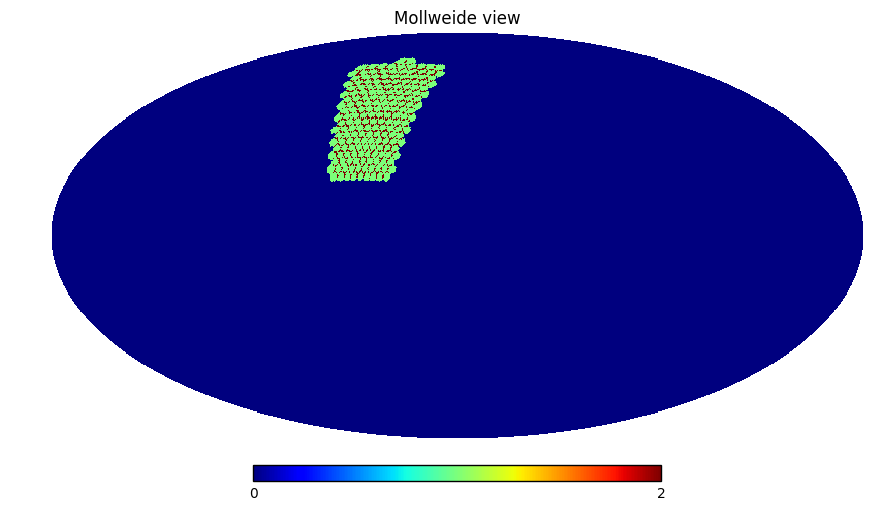

In [8]:
hp.mollview(ssl[0].survey_map)

In [9]:
new_dec

array([ 0.37728321,  0.37703538,  0.37703538,  0.3762742 ,  0.37627419,
        0.37495847,  0.37495846,  0.37301983,  0.37301985,  0.42519983,
        0.42519982,  0.42465665,  0.42465666,  0.42351886,  0.42351884,
        0.42169155,  0.42169156,  0.41903725,  0.41903725,  0.47280221,
        0.47249223,  0.47249224,  0.47152322,  0.47152321,  0.46978826,
        0.46978825,  0.46711917,  0.46711918,  0.51969742,  0.51969742,
        0.51893992,  0.51893993,  0.51733239,  0.51733241,  0.51469886,
        0.51469885,  0.51080258,  0.5108026 ,  0.5661498 ,  0.56570351,
        0.5657035 ,  0.56430689,  0.5643069 ,  0.56180298,  0.56180299,
        0.55795777,  0.55795775,  0.61171522,  0.61171522,  0.61065184,
        0.61065184,  0.60840339,  0.6084034 ,  0.60475515,  0.60475513,
        0.59944132,  0.59944127,  0.65687459,  0.65628256,  0.65628255,
        0.65443043,  0.65443045,  0.65113241,  0.65113241,  0.64613636,
        0.64613639,  0.70111677,  0.70111677,  0.69979577,  0.69

In [10]:
# let's check what the rough area per pointing is
npix = np.size(np.where(ssl[0].survey_map > 0)[0])

In [11]:
npix

6915

In [12]:
area = hp.nside2pixarea(nside, degrees=True)
area_per_pointing = area*npix/new_dec.size
print 'approximate area covered per pointing = %f sq degrees' % area_per_pointing

approximate area covered per pointing = 7.972137 sq degrees


In [13]:
ack= rotate_ra_dec(np.radians(field_data['ra']), np.radians(field_data['dec']),
                                np.radians(45.), np.radians(500.))